# 01 - Data Loading and EDA

Purpose: load the raw credit card fraud dataset and perform initial exploratory analysis without any preprocessing. All randomness is controlled with `random_state=42`.

Key checks:
- Dataset shape and column types
- Missing values
- Class distribution (fraud vs non-fraud)
- Transaction amount and time analysis

**Note:** Do not modify data in this notebook to avoid leakage.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

plt.style.use('seaborn-v0_8')

RAW_PATH = Path('../data/raw/credit_card_fraud_dataset.csv')
assert RAW_PATH.exists(), f"Missing dataset at {RAW_PATH}"

data = pd.read_csv(RAW_PATH)
data.head()

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
0,1,15:35.5,4189.27,688,refund,San Antonio,0
1,2,20:35.5,2659.71,109,refund,Dallas,0
2,3,08:35.5,784.00,394,purchase,New York,0
3,4,50:35.5,3514.40,944,purchase,Philadelphia,0
4,5,51:35.5,369.07,475,purchase,Phoenix,0


In [2]:
# Shape and dtypes
data.shape, data.dtypes

((100000, 7),
 TransactionID        int64
 TransactionDate     object
 Amount             float64
 MerchantID           int64
 TransactionType     object
 Location            object
 IsFraud              int64
 dtype: object)

In [ ]:
# Missing value summary
data.isna().sum().sort_values(ascending=False)

In [9]:
# Class distribution
class_counts = data['IsFraud'].value_counts().rename(index={0: 'Non-Fraud', 1: 'Fraud'})
class_counts

IsFraud
Non-Fraud    99000
Fraud         1000
Name: count, dtype: int64

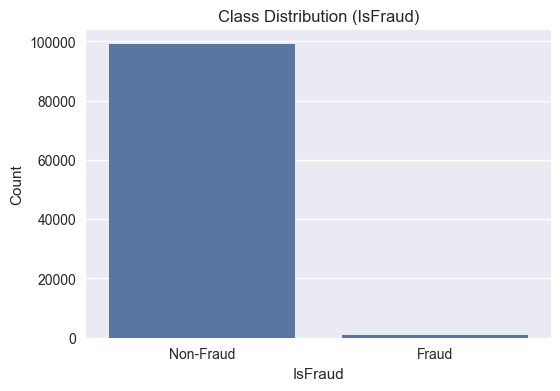

In [10]:
# Plot: Fraud vs Non-Fraud counts
fig, ax = plt.subplots(figsize=(6,4))
sns.barplot(x=class_counts.index, y=class_counts.values, ax=ax)
ax.set_ylabel('Count')
ax.set_title('Class Distribution (IsFraud)')
plt.show()

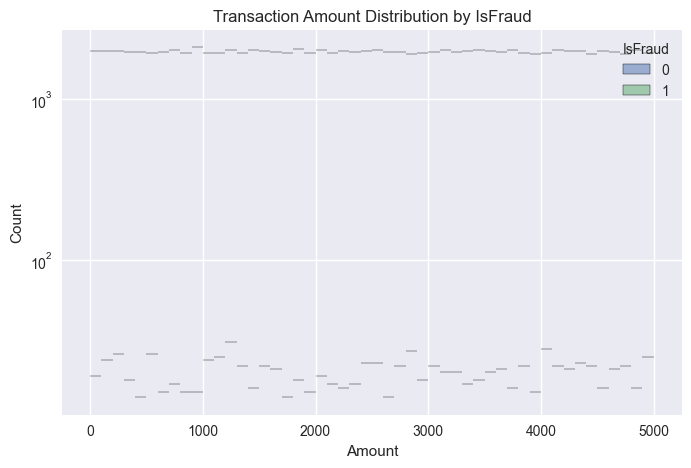

In [11]:
# Transaction Amount distribution by class
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(data=data, x='Amount', hue='IsFraud', log_scale=(False, True), bins=50, ax=ax)
ax.set_title('Transaction Amount Distribution by IsFraud')
plt.show()

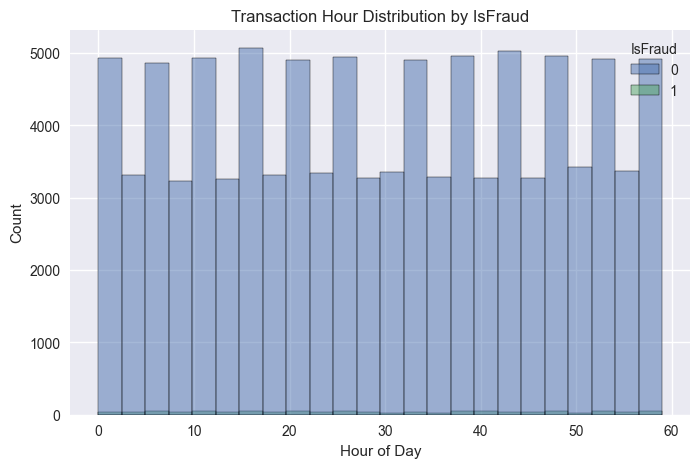

In [12]:
# Transaction time (hour) distribution
# Extract hour component from TransactionDate like '15:35.5'
data = data.copy()
data['TransactionHour'] = data['TransactionDate'].str.split(':').str[0].astype(int)

fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(data=data, x='TransactionHour', hue='IsFraud', bins=24, ax=ax)
ax.set_title('Transaction Hour Distribution by IsFraud')
ax.set_xlabel('Hour of Day')
plt.show()

Next: proceed to `02_data_preprocessing.ipynb` for scaling and dataset splitting (with strict separation to avoid leakage).